In [1]:
import os
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
electronics_df = pd.read_csv("Electronic_dataset.csv")  
electronics_df.head() 

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [3]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
user_id      500000 non-null object
prod_id      500000 non-null object
ratings      500000 non-null float64
timestamp    500000 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [4]:
electronics_df['ratings'].value_counts()

5.0    277826
4.0     95089
1.0     57452
3.0     40382
2.0     29251
Name: ratings, dtype: int64

In [5]:
electronics_df['user_id'].value_counts()

A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
                  ..
A2LU29XZ0RKB14     1
A3HIC1XZQ2GHIJ     1
A2RGA7NH8WE18A     1
A2UVGVEMSIOH4C     1
AATW4666VQTP6      1
Name: user_id, Length: 448368, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAF3282108>,
      dtype=object)

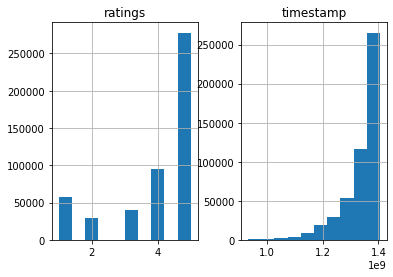

In [6]:
electronics_df.hist()

In [7]:
electronics_df.drop('timestamp',axis=1,inplace=True)

In [8]:
electronics_df.rename(columns={"user_id":"user","prod_id":"item"},inplace=True)

In [9]:
electronics_df.head()

,user,item,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0


In [10]:
electronics_df.isnull().sum()

user       0
item       0
ratings    0
dtype: int64

In [11]:
electronics_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,500000.0,4.013172,1.379996,1.0,3.0,5.0,5.0,5.0


C:\Users\SivaPC\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


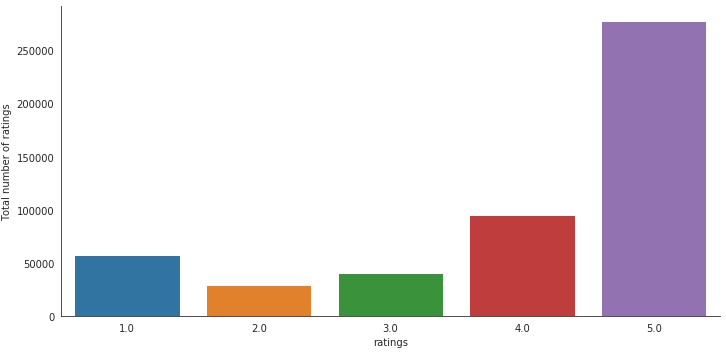

In [12]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=electronics_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [13]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', electronics_df['user'].nunique())
print('Number of unique ITEMS in Raw data = ', electronics_df['item'].nunique())

Number of unique USERS in Raw data =  448368
Number of unique ITEMS in Raw data =  130138


In [14]:
# Top 25 users based on rating
most_rated = electronics_df.groupby('user').size().sort_values(ascending=False)[:25]
most_rated

user
A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
A231WM2Z2JL0U3    24
A2AY4YUOX2N1BQ    23
A6FIAB28IS79      23
A4WEZJOIZIV4U     22
A1ODOGXEYECQQ8    21
A1F9Z42CFF9IAY    20
A3LGT6UZL99IW1    20
A2WLNSZ9U0T1S3    20
A23GFTVIETX7DS    19
AWPODHOB4GFWL     19
A3AYSYSLHU26U9    19
A3CW0ZLUO5X2B1    19
AGVWTYW0ULXHT     18
A1CMD08Z49PGKQ    18
A25C2M3QF9G7OQ    18
A1UQBFCERIP7VJ    18
ARBKYIVNYWK3C     17
A3A4ZAIBQWKOZS    17
A3T7V207KRDE2O    16
A2XRMQA6PJ5ZJ8    16
dtype: int64

### Building Popularity based recommendation model

In [15]:
## Item popularity based on the number of ratings
electronics_df.groupby('item')['ratings'].count().sort_values(ascending=False).head()  

item
B0074BW614    1138
B00DR0PDNE    1094
B007WTAJTO     883
B0019EHU8G     774
B006GWO5WK     770
Name: ratings, dtype: int64

In [16]:
## Item popularity based on the ratings
## This result does not hold good as most of the items are with rating 5.
electronics_df.groupby('item')['ratings'].mean().sort_values(ascending=False).head()  

item
BT008G3W52    5.0
B004AC52UC    5.0
B004AGJRMC    5.0
B004AGED3A    5.0
B004AFOK2U    5.0
Name: ratings, dtype: float64

In [17]:
ratings_mean_count = pd.DataFrame(electronics_df.groupby('item')['ratings'].mean()) 

In [18]:
ratings_mean_count['rating_counts'] = pd.DataFrame(electronics_df.groupby('item')['ratings'].count())  

In [58]:
ratings_mean_count.sort_values(['rating_counts','ratings'],ascending=False)

,ratings,rating_counts
item,,
B0074BW614,4.465729,1138
B00DR0PDNE,3.943327,1094
B007WTAJTO,4.417894,883
B0019EHU8G,4.740310,774
B006GWO5WK,4.275325,770
...,...,...
B00KSU1XNU,1.000000,1
B00KVGAN3W,1.000000,1
B00L0RQ0T2,1.000000,1


In [21]:
#Count of users for each unique item as recommendation score 
data_grouped = electronics_df.groupby('item').agg({'user': 'count'}).reset_index()
data_grouped.rename(columns = {'user': 'score'},inplace=True)
data_grouped.head()

,item,score
0,0439886341,1
1,0528881469,1
2,0594012015,1
3,0594033926,1
4,0594451647,1


In [22]:
#Sort the products on recommendation score 
data_sort = data_grouped.sort_values(['score', 'item'], ascending = False) 
      
#Generate a recommendation rank based upon score 
data_sort['Rank'] = data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = data_sort.head(10) 
popularity_recommendations 

,item,score,Rank
90638,B0074BW614,1138,1.0
120766,B00DR0PDNE,1094,2.0
95656,B007WTAJTO,883,3.0
31800,B0019EHU8G,774,4.0
87388,B006GWO5WK,770,5.0
54771,B003ELYQGG,765,6.0
54835,B003ES5ZUU,681,7.0
85556,B00622AG6S,668,8.0
94534,B007R5YDYA,659,9.0
101456,B008OHNZI0,589,10.0


In [23]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['UserId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [24]:
find_recom = [100,250,500]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 100

        UserId        item  score  Rank
90638      100  B0074BW614   1138   1.0
120766     100  B00DR0PDNE   1094   2.0
95656      100  B007WTAJTO    883   3.0
31800      100  B0019EHU8G    774   4.0
87388      100  B006GWO5WK    770   5.0
54771      100  B003ELYQGG    765   6.0
54835      100  B003ES5ZUU    681   7.0
85556      100  B00622AG6S    668   8.0
94534      100  B007R5YDYA    659   9.0
101456     100  B008OHNZI0    589  10.0


Here is the recommendation for the userId: 250

        UserId        item  score  Rank
90638      250  B0074BW614   1138   1.0
120766     250  B00DR0PDNE   1094   2.0
95656      250  B007WTAJTO    883   3.0
31800      250  B0019EHU8G    774   4.0
87388      250  B006GWO5WK    770   5.0
54771      250  B003ELYQGG    765   6.0
54835      250  B003ES5ZUU    681   7.0
85556      250  B00622AG6S    668   8.0
94534      250  B007R5YDYA    659   9.0
101456     250  B008OHNZI0    589  10.0


Here is the recommen

C:\Users\SivaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
counts = electronics_df['user'].value_counts()
df_final = electronics_df[electronics_df['user'].isin(counts[counts >= 3].index)]
#df_final has users who have rated 3 or more items
# df_final is data subset which will be used for collaborative and top k recommendations


In [84]:
final_ratings_matrix = pd.pivot_table(df_final,index=['user'], columns = 'item', values = "ratings")
final_ratings_matrix.fillna(0,inplace=True)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (8109, 19900)
given_num_of_ratings =  30603
possible_num_of_ratings =  161369100
density: 0.02%


### Building Colloborative Filtering Model

In [85]:
df_final.head()

,user,item,ratings
16,A36OQE3RAOO63J,B001CZ5BOW,5.0
26,A2HX3D3MPPASNS,B004I3VZM2,4.0
39,A15U8KHV4J5DIK,B002BH4QNC,2.0
64,A3PAYT2SQY7J3H,B002WR7VSS,5.0
67,A3MLSY6VS7AB8O,B001IBHF5S,5.0


In [88]:
print('Number of users who have rated 3 or more items =', len(df_final))
print('Number of unique USERS in final data = ', df_final['user'].nunique())
print('Number of unique ITEMS in final data = ', df_final['item'].nunique())

Number of users who have rated 3 or more items = 30603
Number of unique USERS in final data =  8109
Number of unique ITEMS in final data =  19900


In [89]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [90]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final[['user', 'item', 'ratings']], reader)

In [91]:
data

In [92]:
## Splitting data into training and test data set
trainset, testset = train_test_split(data, test_size=.3)

In [93]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [94]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [95]:
test_pred

[Prediction(uid='A3ABCDJ75IIA60', iid='B009BEXSNW', r_ui=4.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A39ANGL5T77E0B', iid='B002R9CQYK', r_ui=5.0, est=3.6666666666666665, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2VNXKHB54FPPP', iid='B000HKGK8Y', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A6O4GOUPWVX96', iid='B008VDKIPK', r_ui=5.0, est=4.2249556530669405, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3JRMMIHO4CP9Q', iid='B00DJUXO9C', r_ui=5.0, est=4.2249556530669405, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2X1VBVA1HDP1D', iid='B001TH7GUU', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2B7BUH8834Y6M', iid='B0079TOEQQ', r_ui=4.0, est=4.166666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3QUTATSDH55LN', iid='B

In [96]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.2494


1.249368946676032

In [97]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [98]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [99]:
test_pred

[Prediction(uid='A3ABCDJ75IIA60', iid='B009BEXSNW', r_ui=4.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A39ANGL5T77E0B', iid='B002R9CQYK', r_ui=5.0, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2VNXKHB54FPPP', iid='B000HKGK8Y', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A6O4GOUPWVX96', iid='B008VDKIPK', r_ui=5.0, est=4.2249556530669405, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3JRMMIHO4CP9Q', iid='B00DJUXO9C', r_ui=5.0, est=4.2249556530669405, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2X1VBVA1HDP1D', iid='B001TH7GUU', r_ui=5.0, est=4.75, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2B7BUH8834Y6M', iid='B0079TOEQQ', r_ui=4.0, est=4.333333333333333, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3QUTATSDH55LN', ii

In [100]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.2540


1.2540267953728863

### Get Top 5 recommendations of Item/Product for a user

In [101]:
df_final.shape

(30603, 3)

In [102]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df = pd.pivot_table(df_final,index=['user'], columns = 'item', values = "ratings")
pivot_df.fillna(0,inplace=True)
print(pivot_df.shape)
pivot_df.head()

(8109, 19900)


item,0594451647,0972683275,1400501466,1400532620,1400532655,140053271X,1400599997,3744295508,5135000011,5342765439,...,B00KMRGF28,B00KO6DS3Q,B00KPE68E8,B00KVQJMG6,B00KWMNDDM,B00KYMCJF8,B00KYSSR7G,B00L2442H0,B00L26YDA4,B00LMCPYPG
user,,,,,,,,,,,,,,,,,,,,,
A0655860XQH1M5Q8JH1M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A06605003CCEBCJX3QR9A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10063PJ5C9WQQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100NGGXRQF0AQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

item,0594451647,0972683275,1400501466,1400532620,1400532655,140053271X,1400599997,3744295508,5135000011,5342765439,...,B00KO6DS3Q,B00KPE68E8,B00KVQJMG6,B00KWMNDDM,B00KYMCJF8,B00KYSSR7G,B00L2442H0,B00L26YDA4,B00LMCPYPG,user_index
user,,,,,,,,,,,,,,,,,,,,,
A0655860XQH1M5Q8JH1M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A06605003CCEBCJX3QR9A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A10063PJ5C9WQQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A100NGGXRQF0AQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [104]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

item,0594451647,0972683275,1400501466,1400532620,1400532655,140053271X,1400599997,3744295508,5135000011,5342765439,...,B00KMRGF28,B00KO6DS3Q,B00KPE68E8,B00KVQJMG6,B00KWMNDDM,B00KYMCJF8,B00KYSSR7G,B00L2442H0,B00L26YDA4,B00LMCPYPG
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# SVD Method

from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 50)
# Construct diagonal array in SVD
sigma = np.diag(sigma)


In [106]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

item,0594451647,0972683275,1400501466,1400532620,1400532655,140053271X,1400599997,3744295508,5135000011,5342765439,...,B00KMRGF28,B00KO6DS3Q,B00KPE68E8,B00KVQJMG6,B00KWMNDDM,B00KYMCJF8,B00KYSSR7G,B00L2442H0,B00L26YDA4,B00LMCPYPG
0,2.547881e-20,-1.610568e-20,2.053025e-06,-5.205007e-07,-4.516076e-07,-9.552302e-22,-5.393794e-21,-6.199691e-06,6.542696e-12,-8.092214e-20,...,-9.435902e-08,1.041598e-08,3.171951e-06,-6.680889e-07,5.534160e-08,-3.809594e-05,-6.934502e-20,1.292985e-04,1.088328e-06,3.171142e-22
1,-1.398760e-33,8.788808e-34,-1.827748e-20,2.173401e-19,3.244578e-19,-9.084730e-36,-3.525381e-35,-4.364445e-19,-1.378528e-25,4.754625e-33,...,-1.476116e-20,2.116236e-23,-6.900129e-21,1.639856e-19,-1.829700e-21,-8.395957e-18,4.156863e-33,-8.536821e-18,-1.773486e-20,-1.811071e-35
2,-4.606266e-35,2.898965e-35,-7.252585e-22,6.615146e-21,1.048211e-20,-3.026744e-37,-8.946391e-37,-1.468280e-20,-4.209543e-27,1.563980e-34,...,-4.915107e-22,-1.912634e-24,7.497856e-22,5.197468e-21,-6.223431e-23,-2.191306e-19,1.369788e-34,-2.973835e-19,-1.008265e-21,-6.479152e-37
3,-1.098588e-34,7.410625e-35,-1.624109e-20,-1.121483e-20,-7.857249e-20,-2.944489e-36,-2.177597e-37,-3.699451e-19,6.214243e-26,4.805123e-34,...,-2.551493e-20,9.234099e-23,-8.386076e-20,-3.353339e-20,-2.605434e-21,-6.466988e-18,3.802446e-34,-1.073123e-18,1.320215e-19,1.955949e-35
4,-1.053746e-18,7.370981e-19,-3.635693e-05,3.135592e-05,-1.044585e-04,3.132271e-21,3.197727e-19,2.667412e-05,-2.523084e-10,3.591737e-18,...,1.029192e-05,-4.585430e-07,-3.068903e-04,6.788532e-05,3.052095e-07,-1.600100e-02,3.121120e-18,-1.452575e-02,-5.331058e-05,5.732604e-20


In [107]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))


In [108]:
# Enter 'userID' and 'num_recommendations' K for the user #
userID = 500 ## Index value
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)

C:\Users\SivaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]



Below are the recommended items for user(user_id = 500):

                   user_ratings  user_predictions
Recommended Items                                
B0088PUEPK                  0.0          0.076831
B007BJHETS                  0.0          0.028649
B0015DYMVO                  0.0          0.027822
B008Y2SPH6                  0.0          0.023722
B001E1Y5O6                  0.0          0.023584


In [109]:
# Enter 'userID' and 'num_recommendations' K for the user #
userID = 250 ## Index value
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 250):

                   user_ratings  user_predictions
Recommended Items                                
B0074BW614                  0.0          0.014844
B007R5YDYA                  0.0          0.010037
B003ES5ZSW                  0.0          0.004855
B003XIJ3MW                  0.0          0.004376
B00902SFC4                  0.0          0.004158


C:\Users\SivaPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


### Evaluation of Model based SVD

In [110]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

item
0594451647    0.000617
0972683275    0.000617
1400501466    0.000863
1400532620    0.000617
1400532655    0.001973
dtype: float64

In [111]:
# Predicted ratings 
preds_df.head()

item,0594451647,0972683275,1400501466,1400532620,1400532655,140053271X,1400599997,3744295508,5135000011,5342765439,...,B00KMRGF28,B00KO6DS3Q,B00KPE68E8,B00KVQJMG6,B00KWMNDDM,B00KYMCJF8,B00KYSSR7G,B00L2442H0,B00L26YDA4,B00LMCPYPG
0,2.547881e-20,-1.610568e-20,2.053025e-06,-5.205007e-07,-4.516076e-07,-9.552302e-22,-5.393794e-21,-6.199691e-06,6.542696e-12,-8.092214e-20,...,-9.435902e-08,1.041598e-08,3.171951e-06,-6.680889e-07,5.534160e-08,-3.809594e-05,-6.934502e-20,1.292985e-04,1.088328e-06,3.171142e-22
1,-1.398760e-33,8.788808e-34,-1.827748e-20,2.173401e-19,3.244578e-19,-9.084730e-36,-3.525381e-35,-4.364445e-19,-1.378528e-25,4.754625e-33,...,-1.476116e-20,2.116236e-23,-6.900129e-21,1.639856e-19,-1.829700e-21,-8.395957e-18,4.156863e-33,-8.536821e-18,-1.773486e-20,-1.811071e-35
2,-4.606266e-35,2.898965e-35,-7.252585e-22,6.615146e-21,1.048211e-20,-3.026744e-37,-8.946391e-37,-1.468280e-20,-4.209543e-27,1.563980e-34,...,-4.915107e-22,-1.912634e-24,7.497856e-22,5.197468e-21,-6.223431e-23,-2.191306e-19,1.369788e-34,-2.973835e-19,-1.008265e-21,-6.479152e-37
3,-1.098588e-34,7.410625e-35,-1.624109e-20,-1.121483e-20,-7.857249e-20,-2.944489e-36,-2.177597e-37,-3.699451e-19,6.214243e-26,4.805123e-34,...,-2.551493e-20,9.234099e-23,-8.386076e-20,-3.353339e-20,-2.605434e-21,-6.466988e-18,3.802446e-34,-1.073123e-18,1.320215e-19,1.955949e-35
4,-1.053746e-18,7.370981e-19,-3.635693e-05,3.135592e-05,-1.044585e-04,3.132271e-21,3.197727e-19,2.667412e-05,-2.523084e-10,3.591737e-18,...,1.029192e-05,-4.585430e-07,-3.068903e-04,6.788532e-05,3.052095e-07,-1.600100e-02,3.121120e-18,-1.452575e-02,-5.331058e-05,5.732604e-20


In [112]:
# Average PREDICTED rating for each item
preds_df.mean().head()

item
0594451647    2.036014e-20
0972683275   -5.079122e-21
1400501466    7.189400e-06
1400532620    1.056252e-05
1400532655    5.782478e-05
dtype: float64

In [113]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(19900, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
item,,,
0594451647,0.000617,2.036014e-20,0
0972683275,0.000617,-5.079122e-21,1
1400501466,0.000863,7.189400e-06,2
1400532620,0.000617,1.056252e-05,3
1400532655,0.001973,5.782478e-05,4


In [114]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00086 



### Insights Summary

The top k items which is not rated for a user is listed through recommend items function and hence user ratings have value 0 for all the items listed out of it.

Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.You can see the differance above for the user id 250 & 500, The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.

SVD model produces better RMSE than Collobarative Filtering as the number of unique users is very high. When data set is filterd for users with item count 5 the number of records is less and RMSE of 1.11 for IBCF while SVD was at 0.001. Further when data set is filtered with users having item count >= 3 the number of records got increased. This increased RMSE of IBCF while reduced that of SVD.

The number of unique products is very less when compared to number of users and hence content based recommendation can be used to address cold start issue of new users. Since number of users are very high popularity or content based recommendation will be used very often when new users come which happens frequently in the given dataset.

Most of the users have rated only 1 item and hence matrix factorization is having lot of sparse data and hence KNN Means recommendation is not suited for this.

Item Based Collaborative Filtering(IBCF) is very reliable for this dataset unlike User Based as the user dataset looks to be unique with the number of rows.